<a href="https://colab.research.google.com/github/seyeon-shijuan/birth-rate-to-universities-visualization/blob/master/notebook/individual_notebooks/Se_young_univ_raw_chart_Y_R_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import random

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

#대학 개황 자료 불러오기 #https://kosis.kr/statHtml/statHtml.do?orgId=334&tblId=DT_1963003_013&conn_path=I2, 
import openpyxl 
df = pd.read_excel("https://raw.githubusercontent.com/seyeon-shijuan/birth-rate-to-universities-visualization/master/data/university_chart_all.xlsx",engine='openpyxl')

df

,시도별,설립주체별,학교현황별,시점,대학 개황
0,총계,계,학교수,1999 년,158
1,총계,계,학교수,2000 년,161
2,총계,계,학교수,2001 년,162
3,총계,계,학교수,2002 년,163
4,총계,계,학교수,2003 년,169
...,...,...,...,...,...
38691,제주,사립,여자,2018 년,87
38692,제주,사립,여자,2019 년,95
38693,제주,사립,여자,2020 년,122
38694,제주,사립,여자,2021 년,96


In [ ]:
# 데이터 필요한 것을 추출
yrdata=df[df["설립주체별"]=="계"]
yrdata=yrdata[yrdata["학교현황별"]=="학교수"]
yrd=yrdata[["시도별","시점","대학 개황"]]

In [ ]:
#시도별 리스트 가져오기
yrd["시도별"].unique()

array(['총계', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원',
       '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [ ]:
#시점 리스트 가져오기
yrd["시점"].unique()

array(['1999 년', '2000 년', '2001 년', '2002 년', '2003 년', '2004 년',
       '2005 년', '2006 년', '2007 년', '2008 년', '2009 년', '2010 년',
       '2011 년', '2012 년', '2013 년', '2014 년', '2015 년', '2016 년',
       '2017 년', '2018 년', '2019 년', '2020 년', '2021 년', '2022 년'],
      dtype=object)

In [ ]:
#내용 확인
yrd.describe()

,시도별,시점,대학 개황
count,418,418,418
unique,18,24,47
top,총계,2022 년,8
freq,24,18,59


In [ ]:
#데이터 타입 확인
yrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 36565
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     418 non-null    object
 1   시점      418 non-null    object
 2   대학 개황   418 non-null    object
dtypes: object(3)
memory usage: 13.1+ KB


In [ ]:
#시점에서 년을 제외하고 숫자로 변경
yrd1=yrd.시점.str.split(' ').str[0]
yrd["시점"]=yrd1

yrd


<ipython-input-15-b0ab7caea185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrd["시점"]=yrd1


,시도별,시점,대학 개황
0,총계,1999,158
1,총계,2000,161
2,총계,2001,162
3,총계,2002,163
4,총계,2003,169
...,...,...,...
36561,제주,2018,2
36562,제주,2019,2
36563,제주,2020,2
36564,제주,2021,2


In [ ]:
#데이터 타입 년으로 변환
yrd2=pd.to_datetime(yrd["시점"])
yrd2.dt.year



0        1999
1        2000
2        2001
3        2002
4        2003
         ... 
36561    2018
36562    2019
36563    2020
36564    2021
36565    2022
Name: 시점, Length: 418, dtype: int64

In [ ]:
#변환한 데이터 대입
yrd["시점"]=yrd2.dt.year

yrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 36565
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     418 non-null    object
 1   시점      418 non-null    int64 
 2   대학 개황   418 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.1+ KB


<ipython-input-17-d958062e3cb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrd["시점"]=yrd2.dt.year


In [ ]:
# 0 대신 들어간 하이픈(-) 제거
yrd["대학 개황"]=yrd["대학 개황"].replace("-",0)

<ipython-input-18-7d277f5b232e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrd["대학 개황"]=yrd["대학 개황"].replace("-",0)


In [ ]:
yrd["시도별"].unique()

array(['총계', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원',
       '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [ ]:
l=len( yrd["시도별"].unique())

In [ ]:
#시도별 컬러코드 생성
colran=range(0,256**3)
cols=random.sample(colran,k=l)
for i in range(len(cols)):
  t=format(cols[i],"06x")
  f="#"+t 
  cols[i]=f
print(cols)


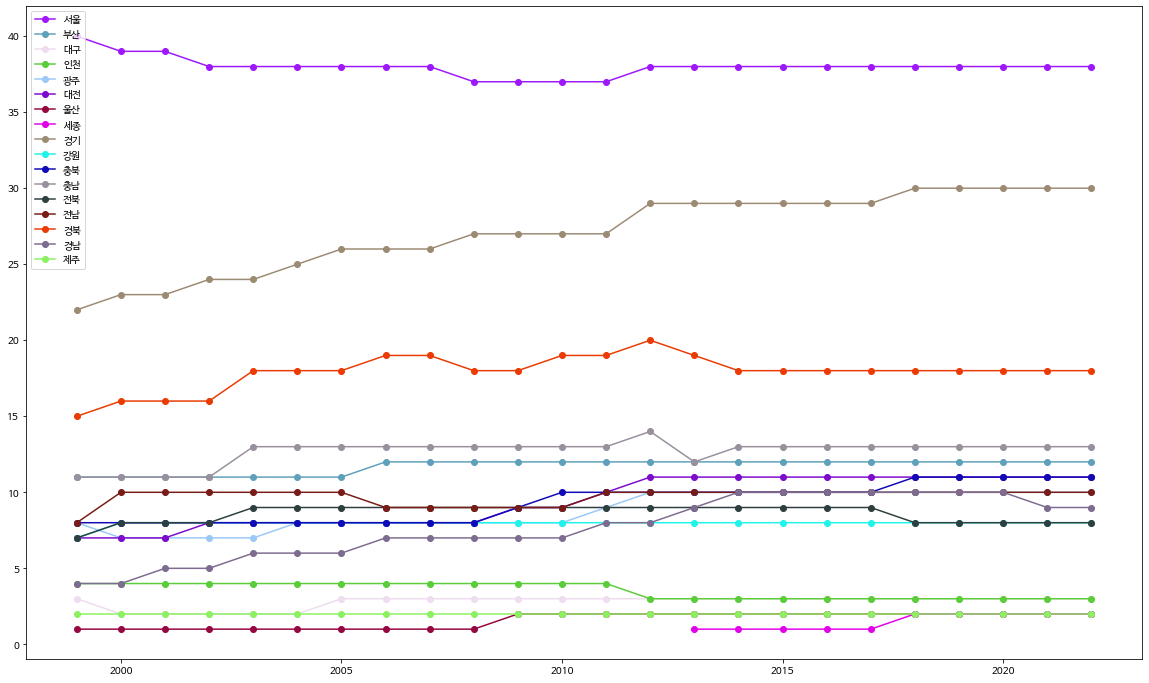

In [ ]:
#그래프 시각화
fig = plt.figure(figsize=(20,12))
ax= fig.add_subplot(111)
i=0
for char in yrd["시도별"].unique():
  if char != '총계':
    
    ax.plot(yrd[yrd["시도별"]==char]["시점"],yrd[yrd["시도별"]==char]["대학 개황"],label=char,marker='o',color=cols[i])
    i= i+1
plt.legend()

- 시도별 대학 개수 변화 추이